# Import solar from database

In [1]:
# import
import requests
import psycopg2
import psycopg2.extras
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame
import json
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#import logging
#import sys

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import cufflinks as cf
tls.set_credentials_file(username='kwarodom', api_key='ljMtxORMkyx0JmiDwIyT')


In [2]:
# database
db_host = "peahivestaging.postgres.database.azure.com"
db_port = "5432"
db_database = "postgres"
db_user = "peahive@peahivestaging"
db_password = "28Sep1960"

In [204]:
# connects to database
try:
    con = psycopg2.connect(host=db_host, port=db_port, database=db_database, user=db_user, password=db_password)
    cur = con.cursor()
    print ("Connects to database successfully")
except Exception as er:
    print ("CONNECTION ERROR: {}".format(er))
print(con.closed)

Connects to database successfully
0


In [205]:
# period
now = datetime(2017,10,28,0,0,0)
start = (datetime(2017,10,28,23,30,0))
stop = (datetime(2017,10,30,23,59,59))
# start = now.replace(day=29, hour=0, minute=0, second=0, microsecond=0)
# stop = now.replace(day=30, hour=23, minute=59, second=59, microsecond=999999)
start_time = str(start)
# stop_time = str(now)
stop_time = str(stop)
today = str(start.date())

In [206]:
# Solar production (y)
query_solar = "SELECT datetime, inverter_activepower FROM ts_inverter WHERE datetime > '" + start_time + "' AND datetime < '"+ stop_time +"' ORDER BY datetime"
df_solar = pd.read_sql_query(query_solar, con)

df_solar.index = pd.to_datetime(df_solar['datetime'])
df_solar_avg = df_solar.resample('30min').mean()
print(df_solar_avg)
# =====================================================================================

                           inverter_activepower
datetime                                       
2017-10-29 00:30:00+00:00              0.000000
2017-10-29 01:00:00+00:00              0.000000
2017-10-29 01:30:00+00:00              0.000000
2017-10-29 02:00:00+00:00              0.000000
2017-10-29 02:30:00+00:00              0.000000
2017-10-29 03:00:00+00:00              0.000000
2017-10-29 03:30:00+00:00              0.000000
2017-10-29 04:00:00+00:00              0.000000
2017-10-29 04:30:00+00:00              0.000000
2017-10-29 05:00:00+00:00              0.000000
2017-10-29 05:30:00+00:00              0.000000
2017-10-29 06:00:00+00:00             16.220379
2017-10-29 06:30:00+00:00             45.294038
2017-10-29 07:00:00+00:00            159.500000
2017-10-29 07:30:00+00:00            324.830721
2017-10-29 08:00:00+00:00            378.797235
2017-10-29 08:30:00+00:00            513.871166
2017-10-29 09:00:00+00:00            670.188976
2017-10-29 09:30:00+00:00            747

In [207]:
# Feature of Solar (xi)
query_features = "SELECT datetime, tempc, humidity, wind_speed, pressure, hourly_sunrise, hourly_moon, hour, night, morning, afternoon, evening FROM ts_feature_solar WHERE datetime > '" + start_time + "' AND datetime < '"+ stop_time +"' ORDER BY datetime"
df_features = pd.read_sql_query(query_features, con)

df_features.index = pd.to_datetime(df_features['datetime'])
df_feature_avg = df_features.resample('30min').mean()
print(df_feature_avg)
# =====================================================================================

                           tempc  humidity  wind_speed  pressure  \
datetime                                                           
2017-10-29 00:00:00+00:00   27.0      79.0         9.3    1013.0   
2017-10-29 00:30:00+00:00   28.0      74.0         7.4    1012.0   
2017-10-29 01:00:00+00:00   27.0      76.0         9.3    1012.0   
2017-10-29 01:30:00+00:00   27.0      79.0         7.4    1012.0   
2017-10-29 02:00:00+00:00   27.0      79.0         5.6    1012.0   
2017-10-29 02:30:00+00:00   26.0      89.0         3.7    1011.0   
2017-10-29 03:00:00+00:00   26.0      89.0         5.6    1011.0   
2017-10-29 03:30:00+00:00   26.0      89.0         5.6    1011.0   
2017-10-29 04:00:00+00:00   26.0      83.0         7.4    1011.0   
2017-10-29 04:30:00+00:00   26.0      89.0         7.4    1011.0   
2017-10-29 05:00:00+00:00   26.0      83.0         7.4    1011.0   
2017-10-29 05:30:00+00:00   26.0      83.0         7.4    1012.0   
2017-10-29 06:00:00+00:00   26.0      83.0      

In [208]:
data_set = df_solar_avg.join(df_feature_avg)
print(data_set)

                           inverter_activepower  tempc  humidity  wind_speed  \
datetime                                                                       
2017-10-29 00:30:00+00:00              0.000000   28.0      74.0         7.4   
2017-10-29 01:00:00+00:00              0.000000   27.0      76.0         9.3   
2017-10-29 01:30:00+00:00              0.000000   27.0      79.0         7.4   
2017-10-29 02:00:00+00:00              0.000000   27.0      79.0         5.6   
2017-10-29 02:30:00+00:00              0.000000   26.0      89.0         3.7   
2017-10-29 03:00:00+00:00              0.000000   26.0      89.0         5.6   
2017-10-29 03:30:00+00:00              0.000000   26.0      89.0         5.6   
2017-10-29 04:00:00+00:00              0.000000   26.0      83.0         7.4   
2017-10-29 04:30:00+00:00              0.000000   26.0      89.0         7.4   
2017-10-29 05:00:00+00:00              0.000000   26.0      83.0         7.4   
2017-10-29 05:30:00+00:00              0

# Checkout Data

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

# checkout data

In [4]:
data_set = pd.read_csv("load_dataset.csv",parse_dates = True, index_col = 0)

In [5]:
data_set.head()

,tempc,humidity,power,HH,H0,H1,H2,H3,H4,H5,...,H18,H19,H20,H21,H22,H23,Night,Morning,Afternoon,Evening
datetime,,,,,,,,,,,,,,,,,,,,,
2017-05-01 00:00:00,25.0,94.0,19.500000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 01:00:00,24.0,94.0,18.166667,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 02:00:00,25.0,65.0,14.666667,2,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 03:00:00,25.0,65.0,14.000000,3,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 04:00:00,23.0,100.0,13.333333,4,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2017-05-01 00:00:00 to 2017-06-01 05:00:00
Data columns (total 32 columns):
tempc        750 non-null float64
humidity     750 non-null float64
power        750 non-null float64
HH           750 non-null int64
H0           750 non-null int64
H1           750 non-null int64
H2           750 non-null int64
H3           750 non-null int64
H4           750 non-null int64
H5           750 non-null int64
H6           750 non-null int64
H7           750 non-null int64
H8           750 non-null int64
H9           750 non-null int64
H10          750 non-null int64
H11          750 non-null int64
H12          750 non-null int64
H13          750 non-null int64
H14          750 non-null int64
H15          750 non-null int64
H16          750 non-null int64
H17          750 non-null int64
H18          750 non-null int64
H19          750 non-null int64
H20          750 non-null int64
H21          750 non-null int64
H22          750 non

In [7]:
data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempc,750.0,26.438667,3.633526,20.0,24.000000,25.00,29.0,36.0
humidity,750.0,80.162667,16.319824,34.0,65.000000,79.00,94.0,100.0
power,750.0,23.339111,7.710790,3.5,17.333333,22.25,27.5,53.5
HH,750.0,11.428000,6.947218,0.0,5.000000,11.00,17.0,23.0
H0,750.0,0.042667,0.202239,0.0,0.000000,0.00,0.0,1.0
H1,750.0,0.042667,0.202239,0.0,0.000000,0.00,0.0,1.0
H2,750.0,0.042667,0.202239,0.0,0.000000,0.00,0.0,1.0
H3,750.0,0.042667,0.202239,0.0,0.000000,0.00,0.0,1.0
H4,750.0,0.042667,0.202239,0.0,0.000000,0.00,0.0,1.0
H5,750.0,0.042667,0.202239,0.0,0.000000,0.00,0.0,1.0


In [8]:
data_set.columns

Index(['tempc', 'humidity', 'power', 'HH', 'H0', 'H1', 'H2', 'H3', 'H4', 'H5',
       'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16',
       'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'Night', 'Morning',
       'Afternoon', 'Evening'],
      dtype='object')

# EDA
Let's create some simple plots to check out the data!

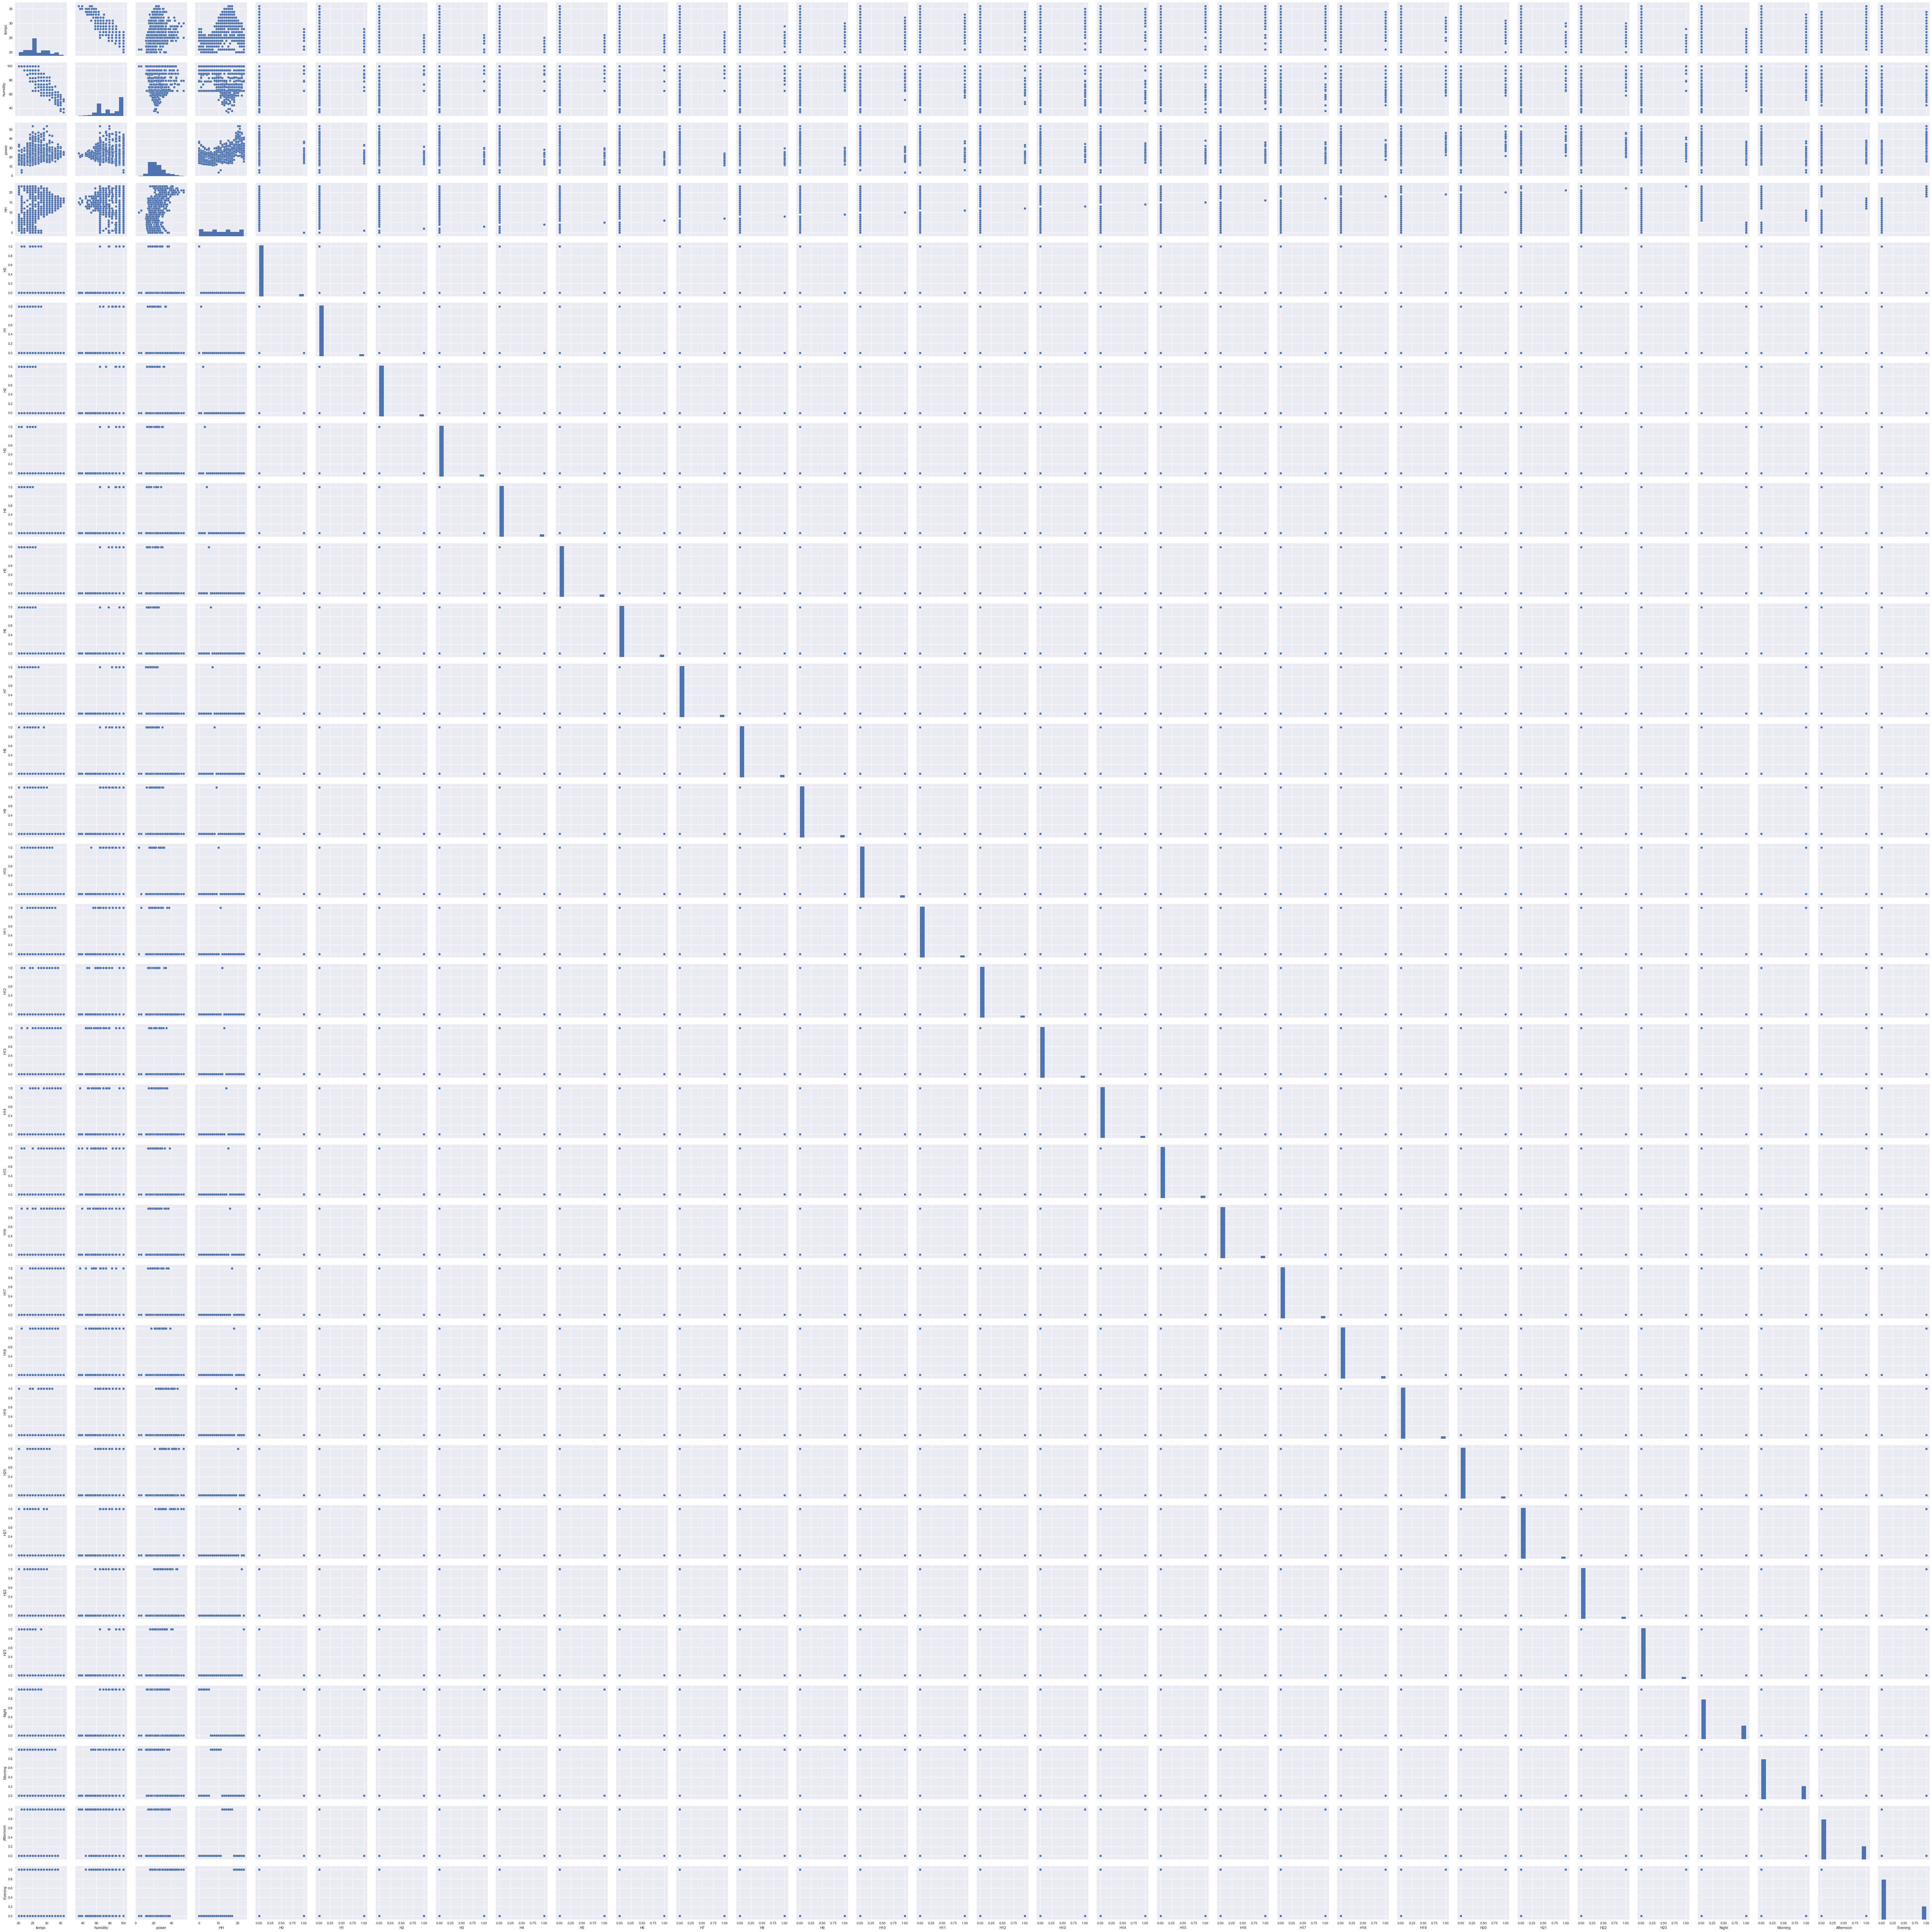

In [9]:
sns.pairplot(data_set)

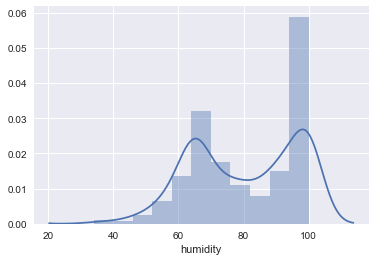

In [10]:
sns.distplot(data_set['humidity'])

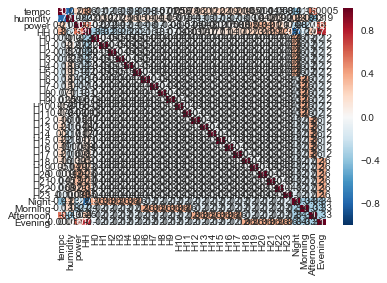

In [11]:
sns.heatmap(data_set.corr(), annot = True)

Import Plotly

In [12]:
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import cufflinks as cf
tls.set_credentials_file(username='kwarodom', api_key='ljMtxORMkyx0JmiDwIyT')

In [ ]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

# Tensorflow DNN Regressor
add more info here

In [14]:
# X = data_set[['tempc','humidity','wind_speed','pressure','hourly_sunrise', 'hourly_moon']]
# X = data_set[['tempc','humidity','wind_speed','pressure','hour']]
X = data_set[['tempc', 'humidity', 'HH', 'H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'Night', 'Morning', 'Afternoon', 'Evening']]
y = data_set['power']
X

,tempc,humidity,HH,H0,H1,H2,H3,H4,H5,H6,...,H18,H19,H20,H21,H22,H23,Night,Morning,Afternoon,Evening
datetime,,,,,,,,,,,,,,,,,,,,,
2017-05-01 00:00:00,25.0,94.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 01:00:00,24.0,94.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 02:00:00,25.0,65.0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 03:00:00,25.0,65.0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 04:00:00,23.0,100.0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 05:00:00,25.0,65.0,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 06:00:00,25.0,65.0,6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2017-05-01 07:00:00,23.0,100.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2017-05-01 08:00:00,25.0,89.0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\phanumat\anaconda3\lib\site-packages
Requirement already up-to-date: protobuf>=3.3.0 in c:\users\phanumat\anaconda3\lib\site-packages (from tensorflow)
Requirement already up-to-date: tensorflow-tensorboard<0.5.0,>=0.4.0rc1 in c:\users\phanumat\anaconda3\lib\site-packages (from tensorflow)
Requirement already up-to-date: numpy>=1.12.1 in c:\users\phanumat\anaconda3\lib\site-packages (from tensorflow)
Requirement already up-to-date: enum34>=1.1.6 in c:\users\phanumat\anaconda3\lib\site-packages (from tensorflow)
Requirement already up-to-date: six>=1.10.0 in c:\users\phanumat\anaconda3\lib\site-packages (from tensorflow)
Requirement already up-to-date: wheel>=0.26 in c:\users\phanumat\anaconda3\lib\site-packages (from tensorflow)
Requirement already up-to-date: setuptools in c:\users\phanumat\anaconda3\lib\site-packages (from protobuf>=3.3.0->tensorflow)
Requirement already up-to-date: html5lib==0.9999999 in c:\users\phanumat\anacon

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(data=scaler.fit_transform(X_test),columns = X_test.columns)
y_train = y_train.reset_index()['power']
y_test = y_test.reset_index()['power']

In [20]:
X.columns

Index(['tempc', 'humidity', 'HH', 'H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6',
       'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16',
       'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'Night', 'Morning',
       'Afternoon', 'Evening'],
      dtype='object')

In [21]:
import tensorflow as tf

In [22]:
tempc = tf.feature_column.numeric_column('tempc')
humidity = tf.feature_column.numeric_column('humidity')
# wind_speed = tf.feature_column.numeric_column('wind_speed')
# pressure = tf.feature_column.numeric_column('pressure')
# hourly_sunrise = tf.feature_column.numeric_column('hourly_sunrise')
# hourly_moon = tf.feature_column.numeric_column('hourly_moon')
# hour = tf.feature_column.numeric_column('HH')
hour0 = tf.feature_column.numeric_column('H0')
hour1= tf.feature_column.numeric_column('H1')
hour2 = tf.feature_column.numeric_column('H2')
hour3 = tf.feature_column.numeric_column('H3')
hour4 = tf.feature_column.numeric_column('H4')
hour5 = tf.feature_column.numeric_column('H5')
hour6 = tf.feature_column.numeric_column('H6')
hour7 = tf.feature_column.numeric_column('H7')
hour8 = tf.feature_column.numeric_column('H8')
hour9 = tf.feature_column.numeric_column('H9')
hour10 = tf.feature_column.numeric_column('H10')
hour11 = tf.feature_column.numeric_column('H11')
hour12 = tf.feature_column.numeric_column('H12')
hour13 = tf.feature_column.numeric_column('H13')
hour14 = tf.feature_column.numeric_column('H14')
hour15 = tf.feature_column.numeric_column('H15')
hour16 = tf.feature_column.numeric_column('H16')
hour17 = tf.feature_column.numeric_column('H17')
hour18 = tf.feature_column.numeric_column('H18')
hour19 = tf.feature_column.numeric_column('H19')
hour20 = tf.feature_column.numeric_column('H20')
hour21 = tf.feature_column.numeric_column('H21')
hour22 = tf.feature_column.numeric_column('H22')
hour23 = tf.feature_column.numeric_column('H23')
morning = tf.feature_column.numeric_column('Morning')
afternoon = tf.feature_column.numeric_column('Afternoon')
evening = tf.feature_column.numeric_column('Evening')
night = tf.feature_column.numeric_column('Night')

In [23]:
# feat_cols = [ tempc, humidity, wind_speed, pressure, hourly_sunrise, hourly_moon]
# feat_cols = [ tempc, humidity, wind_speed, pressure, hour]
# feat_cols = [ tempc, humidity, hour, morning, afternoon, evening, night]
# feat_cols = [ tempc, humidity, morning, afternoon, evening, night, hour, hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]
feat_cols = [ tempc, humidity, morning, afternoon, evening, night, hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]

In [24]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train ,batch_size=10, num_epochs=500, shuffle=False)

In [40]:
model = tf.estimator.DNNRegressor(hidden_units=[6,6,6,6],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Phanumat\\AppData\\Local\\Temp\\tmpm1yjoktl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002110D1DAC88>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
model.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Phanumat\AppData\Local\Temp\tmpm1yjoktl\model.ckpt.
INFO:tensorflow:loss = 4860.0, step = 1
INFO:tensorflow:global_step/sec: 52.4425
INFO:tensorflow:loss = 437.127, step = 101 (1.954 sec)
INFO:tensorflow:global_step/sec: 71.713
INFO:tensorflow:loss = 696.223, step = 201 (1.379 sec)
INFO:tensorflow:global_step/sec: 68.4888
INFO:tensorflow:loss = 129.534, step = 301 (1.484 sec)
INFO:tensorflow:global_step/sec: 60.8319
INFO:tensorflow:loss = 703.874, step = 401 (1.634 sec)
INFO:tensorflow:global_step/sec: 71.2733
INFO:tensorflow:loss = 332.337, step = 501 (1.409 sec)
INFO:tensorflow:global_step/sec: 56.0632
INFO:tensorflow:loss = 189.491, step = 601 (1.806 sec)
INFO:tensorflow:global_step/sec: 56.9654
INFO:tensorflow:loss = 248.163, step = 701 (1.749 sec)
INFO:tensorflow:global_step/sec: 55.1048
INFO:tensorflow:loss = 267.9, step = 801 (1.823 sec)
INFO:tensorflow:global_step/sec: 55.5879
INF

INFO:tensorflow:global_step/sec: 57.0514
INFO:tensorflow:loss = 146.697, step = 8401 (1.738 sec)
INFO:tensorflow:global_step/sec: 54.6137
INFO:tensorflow:loss = 392.553, step = 8501 (1.880 sec)
INFO:tensorflow:global_step/sec: 44.9502
INFO:tensorflow:loss = 603.833, step = 8601 (2.190 sec)
INFO:tensorflow:global_step/sec: 47.0792
INFO:tensorflow:loss = 134.895, step = 8701 (2.112 sec)
INFO:tensorflow:global_step/sec: 60.4407
INFO:tensorflow:loss = 619.894, step = 8801 (1.647 sec)
INFO:tensorflow:global_step/sec: 60.7447
INFO:tensorflow:loss = 343.465, step = 8901 (1.679 sec)
INFO:tensorflow:global_step/sec: 58.4485
INFO:tensorflow:loss = 190.566, step = 9001 (1.681 sec)
INFO:tensorflow:global_step/sec: 57.875
INFO:tensorflow:loss = 242.28, step = 9101 (1.728 sec)
INFO:tensorflow:global_step/sec: 57.7657
INFO:tensorflow:loss = 243.214, step = 9201 (1.716 sec)
INFO:tensorflow:global_step/sec: 58.2713
INFO:tensorflow:loss = 158.197, step = 9301 (1.721 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 57.2089
INFO:tensorflow:loss = 141.279, step = 16801 (1.776 sec)
INFO:tensorflow:global_step/sec: 59.1927
INFO:tensorflow:loss = 396.968, step = 16901 (1.674 sec)
INFO:tensorflow:global_step/sec: 58.6042
INFO:tensorflow:loss = 594.309, step = 17001 (1.694 sec)
INFO:tensorflow:global_step/sec: 53.2857
INFO:tensorflow:loss = 124.423, step = 17101 (1.924 sec)
INFO:tensorflow:global_step/sec: 46.869
INFO:tensorflow:loss = 586.945, step = 17201 (2.096 sec)
INFO:tensorflow:global_step/sec: 48.618
INFO:tensorflow:loss = 344.731, step = 17301 (2.071 sec)
INFO:tensorflow:global_step/sec: 51.7861
INFO:tensorflow:loss = 187.557, step = 17401 (1.921 sec)
INFO:tensorflow:global_step/sec: 59.2614
INFO:tensorflow:loss = 232.317, step = 17501 (1.674 sec)
INFO:tensorflow:global_step/sec: 57.0814
INFO:tensorflow:loss = 228.958, step = 17601 (1.776 sec)
INFO:tensorflow:global_step/sec: 58.2975
INFO:tensorflow:loss = 165.627, step = 17701 (1.691 sec)
INFO:tensorflow:global

In [42]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [43]:
pred_gen = model.predict(predict_input_func)

In [44]:
predictions = list(pred_gen)
predictions

INFO:tensorflow:Restoring parameters from C:\Users\Phanumat\AppData\Local\Temp\tmpm1yjoktl\model.ckpt-20000


[{'predictions': array([ 28.38836479], dtype=float32)},
 {'predictions': array([ 22.96822739], dtype=float32)},
 {'predictions': array([ 22.09993553], dtype=float32)},
 {'predictions': array([ 19.24168396], dtype=float32)},
 {'predictions': array([ 33.52220917], dtype=float32)},
 {'predictions': array([ 18.95293045], dtype=float32)},
 {'predictions': array([ 22.75860596], dtype=float32)},
 {'predictions': array([ 23.8095417], dtype=float32)},
 {'predictions': array([ 21.30906677], dtype=float32)},
 {'predictions': array([ 16.26265335], dtype=float32)},
 {'predictions': array([ 18.87847328], dtype=float32)},
 {'predictions': array([ 21.70805359], dtype=float32)},
 {'predictions': array([ 27.33978653], dtype=float32)},
 {'predictions': array([ 16.85530853], dtype=float32)},
 {'predictions': array([ 18.18230438], dtype=float32)},
 {'predictions': array([ 21.24708366], dtype=float32)},
 {'predictions': array([ 27.5916481], dtype=float32)},
 {'predictions': array([ 15.95242882], dtype=float

In [45]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y_test,final_preds)**0.5

5.9976024972762811

In [48]:
len(y_test)

225

In [49]:
data_set.shape[0]

750

In [50]:
trace1 = go.Scatter(
    x=data_set.index[(data_set.shape[0]-len(y_test)):data_set.shape[0]],
    y=final_preds,
    name='predictions'
)
# y_test
trace2 = go.Scatter(
    x=data_set.index[(data_set.shape[0]-len(y_test)):data_set.shape[0]],
    y=y_test,
    name='y_test'
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        title='time'
    ),
    yaxis=dict(
        title='power (watt)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [51]:
# print(final_preds)
# print(y_test)


res = [x - y for x, y in zip(final_preds, y_test)]

In [52]:
trace1 = go.Scatter(
    x=data_set.index[(data_set.shape[0]-len(y_test)):data_set.shape[0]],
    y=res,
    name='residual'
)
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='time'
    ),
    yaxis=dict(
        title='power (watt)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [53]:
from sklearn import metrics

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, final_preds))
print('MSE:', metrics.mean_squared_error(y_test, final_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

MAE: 4.86380943889
MSE: 35.9712357153
RMSE: 5.99760249728


# result of training set

In [202]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_train,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

pred_gen = model.predict(predict_input_func)

predictions = list(pred_gen)

final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\Phanumat\AppData\Local\Temp\tmpgjtidiqi\model.ckpt-10000


In [203]:
print('MAE:', metrics.mean_absolute_error(y_train, final_preds))
print('MSE:', metrics.mean_squared_error(y_train, final_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, final_preds)))

MAE: 4.21326283744
MSE: 27.3452196217
RMSE: 5.22926568666


In [204]:
len(y_train)

525

In [166]:
trace1 = go.Scatter(
    x=data_set.index[0:len(y_train)],
    y=final_preds,
    name='predictions'
)
# y_test
trace2 = go.Scatter(
    x=data_set.index[0:len(y_train)],
    y=y_train,
    name='y_train',
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        title='time'
    ),
    yaxis=dict(
        title='power (Watt)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)